In [24]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import skimage.transform
import tensorflow as tf
import tensorflow_addons as tfa
import skimage.color
import numpy as np
import os

print(tf.__version__)

2.7.0


# Import the dataset
We used a homemade dataset composed of multiple fonts and line weights.
We only keep 250 randomly chosen instances of each character.

In [25]:
dataset_folder="homemade-digits"
images = np.ndarray((0, 28, 28))
labels = np.ndarray((0), dtype=int)

for i in np.arange(0, 10):
    file_names = os.listdir(f'../img/{dataset_folder}/{i}')
    np.random.shuffle(file_names)

    for file in file_names[:800]:
        cell = skimage.transform.resize(plt.imread(f'../img/{dataset_folder}/{i}/{file}'), (28, 28))
        cell = skimage.color.rgb2gray(cell)
        cell = np.where(cell < .25, 0, 1)
        images = np.concatenate((images, [cell]))
        labels = np.append(labels, i)

print(f'Train and test are composed of {len(images)} instances of {dataset_folder} dataset.')
print(images.shape)

Train and test are composed of 8000 instances of homemade-digits dataset.
(8000, 28, 28)


## Dataset overview

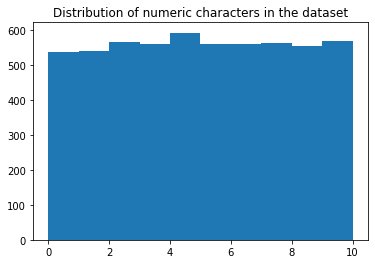

In [26]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.7, random_state=42)

plt.hist(train_labels, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title("Distribution of numeric characters in the dataset")
plt.show()

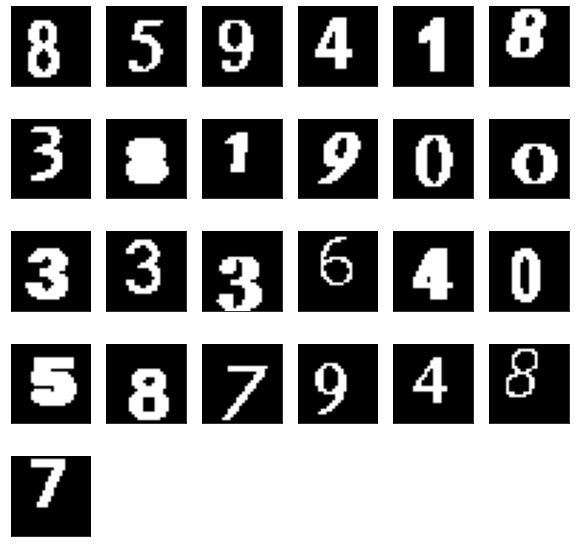

In [27]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ax.xaxis.label.set_color("white")
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(train_labels[i])

# Create and train the model

In [28]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=7)
model.save('../model.h5', save_format='tf')

Epoch 1/7
175/175 [==============================] - 6s 34ms/step - loss: 0.8839 - accuracy: 0.7188
Epoch 2/7
175/175 [==============================] - 6s 33ms/step - loss: 0.1398 - accuracy: 0.9641
Epoch 3/7
175/175 [==============================] - 6s 33ms/step - loss: 0.0622 - accuracy: 0.9845
Epoch 4/7
175/175 [==============================] - 5s 31ms/step - loss: 0.0350 - accuracy: 0.9911
Epoch 5/7
175/175 [==============================] - 7s 37ms/step - loss: 0.0244 - accuracy: 0.9936
Epoch 6/7
175/175 [==============================] - 6s 34ms/step - loss: 0.0126 - accuracy: 0.9975
Epoch 7/7
175/175 [==============================] - 5s 31ms/step - loss: 0.0095 - accuracy: 0.9980


In [29]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_8 (Flatten)         (None, 9216)              0         
                                                      

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

75/75 [==============================] - 1s 6ms/step - loss: 0.0460 - accuracy: 0.9867
Test accuracy: 0.9866666793823242


# Test the model on real sudoku cells

C:\Users\km169\AppData\Local\Temp/ipykernel_20264/1312716103.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  cell = skimage.color.rgb2gray(cell)


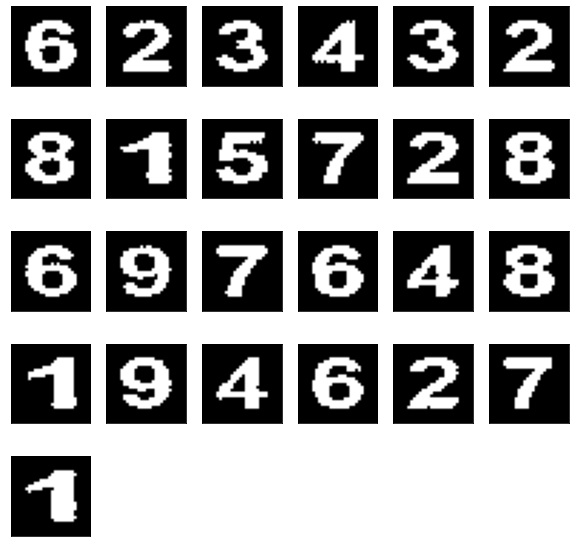

In [31]:
plt.figure(figsize=(10, 10))

for i in range(25):
    ax = plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ax.xaxis.label.set_color("white")

    cell = plt.imread("../img/cells/"+str(i)+".png")
    cell = skimage.transform.resize(cell, (28, 28))
    cell = skimage.color.rgb2gray(cell)
    cell = np.where(cell < .5, 0, 1)
    cell = (np.expand_dims(cell,0))

    plt.imshow(cell[0], cmap=plt.cm.gray)
    plt.xlabel(np.argmax(model.predict(cell)))
plt.show()